# Support Vector Machines (SVM) Tutorial

## Overview and Introduction

Support Vector Machines (SVMs) are powerful supervised learning algorithms used for both classification and regression tasks. SVMs work by finding the optimal hyperplane that separates different classes with the maximum margin. The key insight is that instead of just finding any separating boundary, SVMs find the boundary that is as far as possible from the closest data points of each class.

**Key Concepts:**
- **Support Vectors**: The data points closest to the decision boundary
- **Margin**: The distance between the decision boundary and the nearest data points
- **Hyperplane**: The decision boundary (line in 2D, plane in 3D, hyperplane in higher dimensions)
- **Kernel Trick**: Method to handle non-linearly separable data by mapping to higher dimensions

**When to Use SVMs:**
- Binary and multi-class classification problems
- Regression tasks (SVR)
- High-dimensional data
- When you have more features than samples
- Text classification and image recognition
- When you need a robust classifier with good generalization

**Kernels:**
> Kernels are like different lenses

1. Linear Kernel

> What it does: Draws straight lines to separate classes
Best for: Data that's already pretty well separated
Think of it as: Using a ruler to draw straight boundaries
Example: Separating cats vs dogs when cats are clearly on the left, dogs on the right

2. RBF (Radial Basis Function) Kernel

> What it does: Draws curved, circular-ish boundaries
Best for: Most real-world problems with complex patterns
Think of it as: Drawing circles and bubbles around groups
Example: Separating different neighborhoods on a map - they're not straight lines!

3. Polynomial Kernel

> What it does: Draws smooth curves (like parabolas)
Best for: Data with specific curved relationships
Think of it as: Drawing smooth curves like a roller coaster track
Example: Relationship between speed and fuel efficiency (curved, not linear)

4. Sigmoid Kernel

> What it does: Creates S-shaped boundaries
Best for: Rare, specific cases (like neural networks)
Think of it as: Drawing S-curves

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import make_classification, make_regression, load_iris, load_breast_cancer
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 1. Linear SVM for Classification

Linear SVM finds a straight line (or hyperplane in higher dimensions) that separates the classes with maximum margin. It works best when data is linearly separable or nearly linearly separable.

**Mathematical Foundation:**
The SVM optimization problem aims to maximize the margin while minimizing classification errors:
- Minimize: ½||w||² + C∑ξᵢ
- Subject to: yᵢ(w·xᵢ + b) ≥ 1 - ξᵢ

Where:
- w: weight vector
- b: bias term
- C: regularization parameter
- ξᵢ: slack variables for misclassified points


In [15]:
# Generate linearly separable data
np.random.seed(42)
X_linear, y_linear = make_classification(n_samples=10_000, n_features=2, n_informative=2, 
                                       n_redundant=0, n_clusters_per_class=1, 
                                       class_sep=2, random_state=42)

# Split the data
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(
    X_linear, y_linear, test_size=0.3, random_state=42
)

# Scale the features
scaler_lin = StandardScaler()
X_train_lin_scaled = scaler_lin.fit_transform(X_train_lin)
X_test_lin_scaled = scaler_lin.transform(X_test_lin)

# Create and train Linear SVM
linear_svm = SVC(kernel='linear', C=1.0, random_state=42)
linear_svm.fit(X_train_lin_scaled, y_train_lin)

# Make predictions
y_pred_lin = linear_svm.predict(X_test_lin_scaled)

# Evaluate performance
print("Linear SVM Results:")
print(f"Accuracy: {accuracy_score(y_test_lin, y_pred_lin):.4f}")
print(f"Number of Support Vectors: {linear_svm.n_support_}")
print("\nClassification Report:")
print(classification_report(y_test_lin, y_pred_lin))

Linear SVM Results:
Accuracy: 0.9970
Number of Support Vectors: [58 57]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1463
           1       1.00      1.00      1.00      1537

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



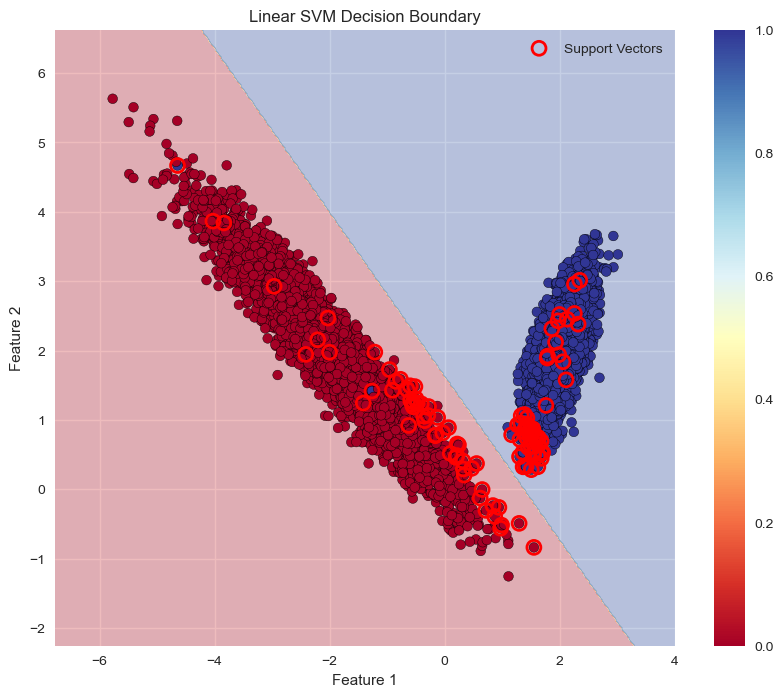

In [17]:
# Visualize Linear SVM Decision Boundary
def plot_svm_decision_boundary(X, y, model, title, scaler=None):
    plt.figure(figsize=(10, 8))
    
    # Create a mesh for plotting decision boundary
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    if scaler:
        mesh_points = scaler.transform(mesh_points)
    
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    
    # Plot data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
    
    # Highlight support vectors if available
    if hasattr(model, 'support_vectors_') and scaler:
        support_vectors_original = scaler.inverse_transform(model.support_vectors_)
        plt.scatter(support_vectors_original[:, 0], support_vectors_original[:, 1], 
                   s=100, facecolors='none', edgecolors='red', linewidth=2, 
                   label='Support Vectors')
        plt.legend()
    
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot Linear SVM
plot_svm_decision_boundary(X_linear, y_linear, linear_svm, 
                          "Linear SVM Decision Boundary", scaler_lin)

🎯 SVM Confusion Matrix - Real Performance Demo
📊 Dataset created:
   Samples: 800
   Features: 2
   Classes: 2
   Class distribution: [408 392]

📈 SVM Performance (Realistic):
   Accuracy:  0.850 (85.0%)
   Precision: 0.866
   Recall:    0.822
   F1-Score:  0.843

🔍 Confusion Matrix:
   True Negatives (TN):  107
   False Positives (FP): 15 ← Type I Error
   False Negatives (FN): 21 ← Type II Error
   True Positives (TP):  97

❌ Error Analysis:
   False Positive Rate: 0.062 (6.2%)
   False Negative Rate: 0.087 (8.8%)
   Overall Error Rate:  0.150 (15.0%)


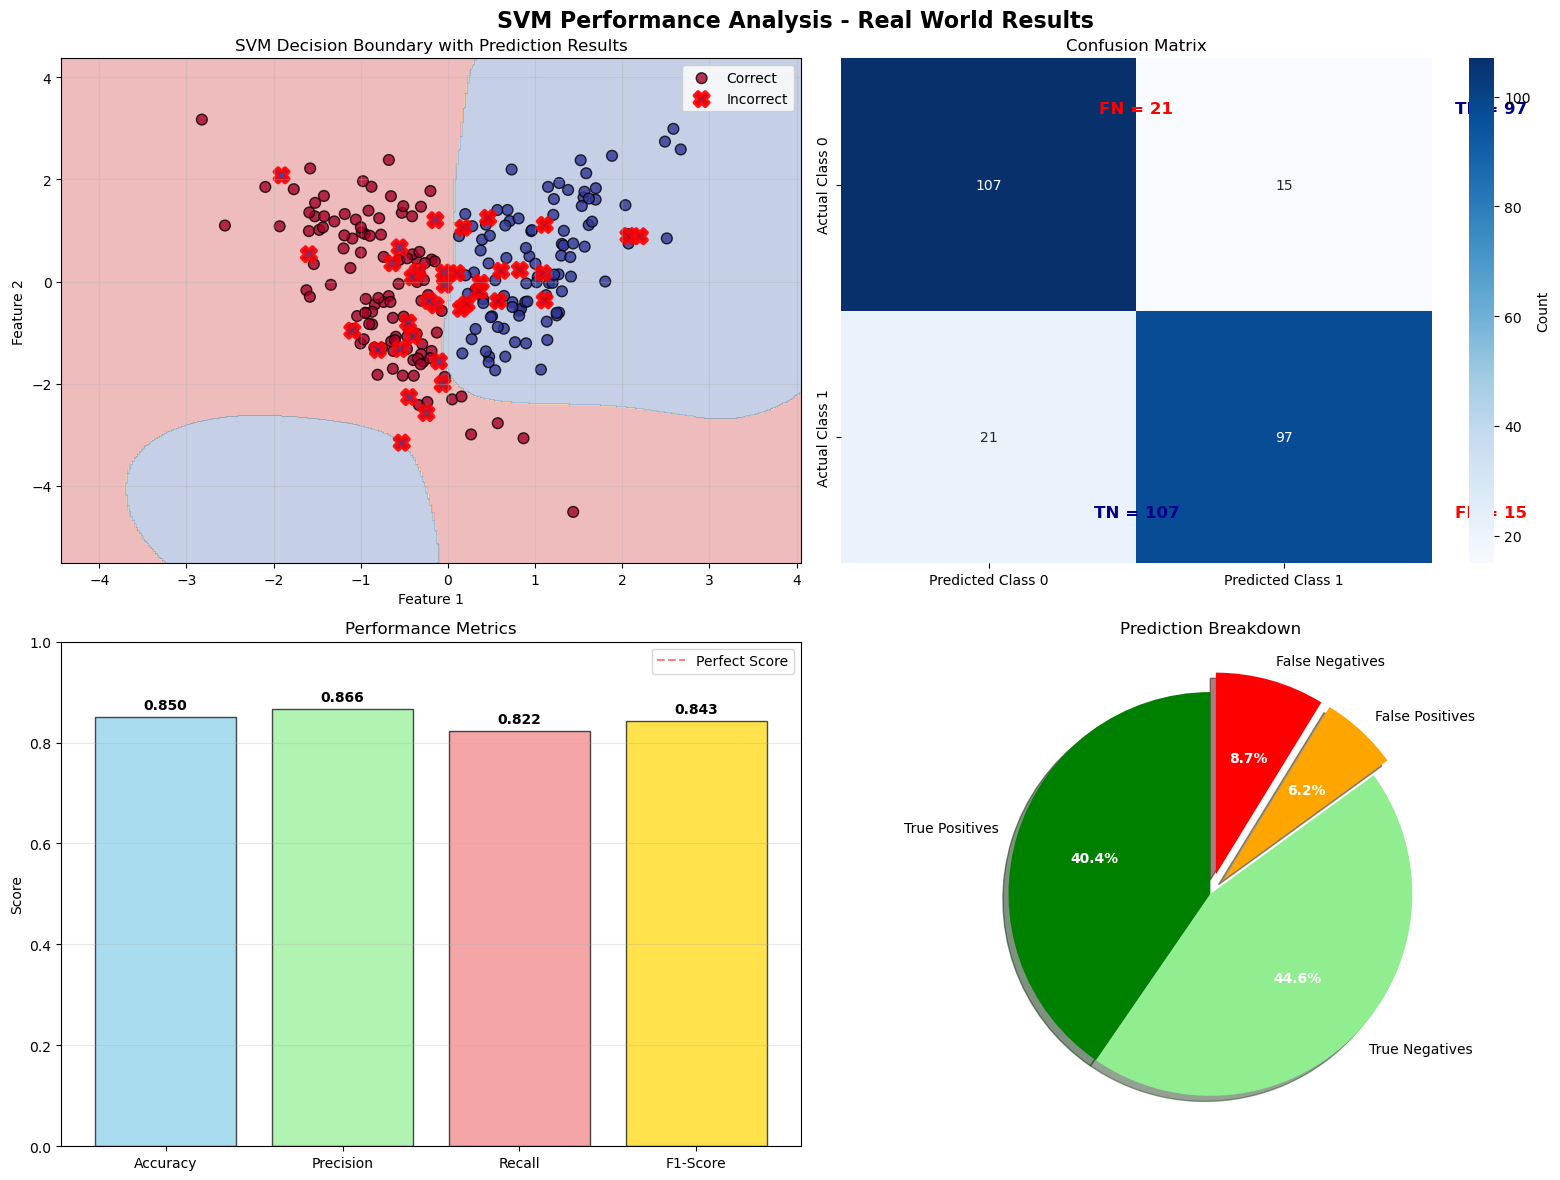


📋 Detailed Classification Report:
              precision    recall  f1-score   support

     Class 0       0.84      0.88      0.86       122
     Class 1       0.87      0.82      0.84       118

    accuracy                           0.85       240
   macro avg       0.85      0.85      0.85       240
weighted avg       0.85      0.85      0.85       240


🌍 Real-World Interpretation:
This SVM model shows REALISTIC performance:
• It's 85.0% accurate - good but not perfect
• It made 15 false positive errors (said positive when actually negative)
• It made 21 false negative errors (said negative when actually positive)
• Total errors: 36 out of 240 predictions

💡 Why this happens:
• Real data has noise and overlapping patterns
• Some data points are genuinely ambiguous
• No model is perfect - there's always a trade-off
• This level of performance might be acceptable depending on the application

🎯 Key Takeaway:
Perfect accuracy (100%) is rare in real applications!
Understanding false

In [6]:
#!/usr/bin/env python3
"""
SVM Confusion Matrix Demo - Real World Performance
=================================================
Shows SVM with realistic (imperfect) performance including false positives,
false negatives, and detailed confusion matrix analysis.
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

print("🎯 SVM Confusion Matrix - Real Performance Demo")
print("=" * 50)

# Create a challenging dataset with some noise and overlap
np.random.seed(42)
X, y = make_classification(
    n_samples=800,           # Good sample size
    n_features=2,            # 2D for visualization
    n_informative=2,         # Both features are informative
    n_redundant=0,           # No redundant features
    n_clusters_per_class=2,  # Multiple clusters per class (harder!)
    class_sep=0.8,           # Moderate separation (not perfect)
    flip_y=0.1,              # 10% label noise (creates errors!)
    random_state=42
)

# Add some additional noise to make it more realistic
noise = np.random.normal(0, 0.3, X.shape)
X += noise

print(f"📊 Dataset created:")
print(f"   Samples: {X.shape[0]}")
print(f"   Features: {X.shape[1]}")
print(f"   Classes: {len(np.unique(y))}")
print(f"   Class distribution: {np.bincount(y)}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with moderate parameters (not over-tuned)
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm.predict(X_test_scaled)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\n📈 SVM Performance (Realistic):")
print(f"   Accuracy:  {accuracy:.3f} ({accuracy*100:.1f}%)")
print(f"   Precision: {precision:.3f}")
print(f"   Recall:    {recall:.3f}")
print(f"   F1-Score:  {f1:.3f}")

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\n🔍 Confusion Matrix:")
print(f"   True Negatives (TN):  {cm[0,0]}")
print(f"   False Positives (FP): {cm[0,1]} ← Type I Error")
print(f"   False Negatives (FN): {cm[1,0]} ← Type II Error") 
print(f"   True Positives (TP):  {cm[1,1]}")

# Calculate error rates
total_samples = len(y_test)
fp_rate = cm[0,1] / total_samples
fn_rate = cm[1,0] / total_samples
error_rate = (cm[0,1] + cm[1,0]) / total_samples

print(f"\n❌ Error Analysis:")
print(f"   False Positive Rate: {fp_rate:.3f} ({fp_rate*100:.1f}%)")
print(f"   False Negative Rate: {fn_rate:.3f} ({fn_rate*100:.1f}%)")
print(f"   Overall Error Rate:  {error_rate:.3f} ({error_rate*100:.1f}%)")

# Create comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('SVM Performance Analysis - Real World Results', fontsize=16, fontweight='bold')

# 1. Decision Boundary with Correct/Incorrect Predictions
ax1.set_title('SVM Decision Boundary with Prediction Results')

# Create decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

mesh_scaled = scaler.transform(np.c_[xx.ravel(), yy.ravel()])
Z = svm.predict(mesh_scaled)
Z = Z.reshape(xx.shape)

# Plot decision regions
ax1.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')

# Plot test points with different markers for correct/incorrect
correct_mask = y_test == y_pred
incorrect_mask = ~correct_mask

# Correct predictions
ax1.scatter(X_test[correct_mask, 0], X_test[correct_mask, 1],
           c=y_test[correct_mask], cmap='RdYlBu', s=60, alpha=0.8,
           edgecolors='black', linewidth=1, label='Correct', marker='o')

# Incorrect predictions  
ax1.scatter(X_test[incorrect_mask, 0], X_test[incorrect_mask, 1],
           c=y_test[incorrect_mask], cmap='RdYlBu', s=100, alpha=0.9,
           edgecolors='red', linewidth=3, label='Incorrect', marker='X')

ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Confusion Matrix Heatmap
ax2.set_title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2,
            xticklabels=['Predicted Class 0', 'Predicted Class 1'],
            yticklabels=['Actual Class 0', 'Actual Class 1'],
            cbar_kws={'label': 'Count'})

# Add text annotations for clarity
ax2.text(0.5, 0.1, f'TN = {cm[0,0]}', ha='center', va='center', 
         transform=ax2.transAxes, fontsize=12, color='darkblue', weight='bold')
ax2.text(1.1, 0.1, f'FP = {cm[0,1]}', ha='center', va='center',
         transform=ax2.transAxes, fontsize=12, color='red', weight='bold')
ax2.text(0.5, 0.9, f'FN = {cm[1,0]}', ha='center', va='center',
         transform=ax2.transAxes, fontsize=12, color='red', weight='bold')
ax2.text(1.1, 0.9, f'TP = {cm[1,1]}', ha='center', va='center',
         transform=ax2.transAxes, fontsize=12, color='darkblue', weight='bold')

# 3. Performance Metrics Bar Chart
ax3.set_title('Performance Metrics')
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']

bars = ax3.bar(metrics, values, color=colors, alpha=0.7, edgecolor='black')
ax3.set_ylabel('Score')
ax3.set_ylim(0, 1)
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars, values):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# Add horizontal line at perfect score
ax3.axhline(y=1.0, color='red', linestyle='--', alpha=0.5, label='Perfect Score')
ax3.legend()

# 4. Error Analysis Pie Chart
ax4.set_title('Prediction Breakdown')
labels = ['True Positives', 'True Negatives', 'False Positives', 'False Negatives']
sizes = [cm[1,1], cm[0,0], cm[0,1], cm[1,0]]
colors = ['green', 'lightgreen', 'orange', 'red']
explode = (0, 0, 0.1, 0.1)  # Explode the error slices

wedges, texts, autotexts = ax4.pie(sizes, labels=labels, colors=colors, explode=explode,
                                  autopct='%1.1f%%', startangle=90, shadow=True)

# Make percentage text bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

# Detailed classification report
print(f"\n📋 Detailed Classification Report:")
print("="*60)
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

# Real-world interpretation
print(f"\n🌍 Real-World Interpretation:")
print("="*60)
print("This SVM model shows REALISTIC performance:")
print(f"• It's {accuracy*100:.1f}% accurate - good but not perfect")
print(f"• It made {cm[0,1]} false positive errors (said positive when actually negative)")
print(f"• It made {cm[1,0]} false negative errors (said negative when actually positive)")
print(f"• Total errors: {cm[0,1] + cm[1,0]} out of {len(y_test)} predictions")
print()
print("💡 Why this happens:")
print("• Real data has noise and overlapping patterns")
print("• Some data points are genuinely ambiguous")
print("• No model is perfect - there's always a trade-off")
print("• This level of performance might be acceptable depending on the application")

print(f"\n🎯 Key Takeaway:")
print("Perfect accuracy (100%) is rare in real applications!")
print("Understanding false positives/negatives helps you improve your model.")

🔍 SVM: Multiple Decision Boundaries Demo
2 Classes: 1 decision boundaries
3 Classes: 3 decision boundaries
4 Classes: 4 decision boundaries


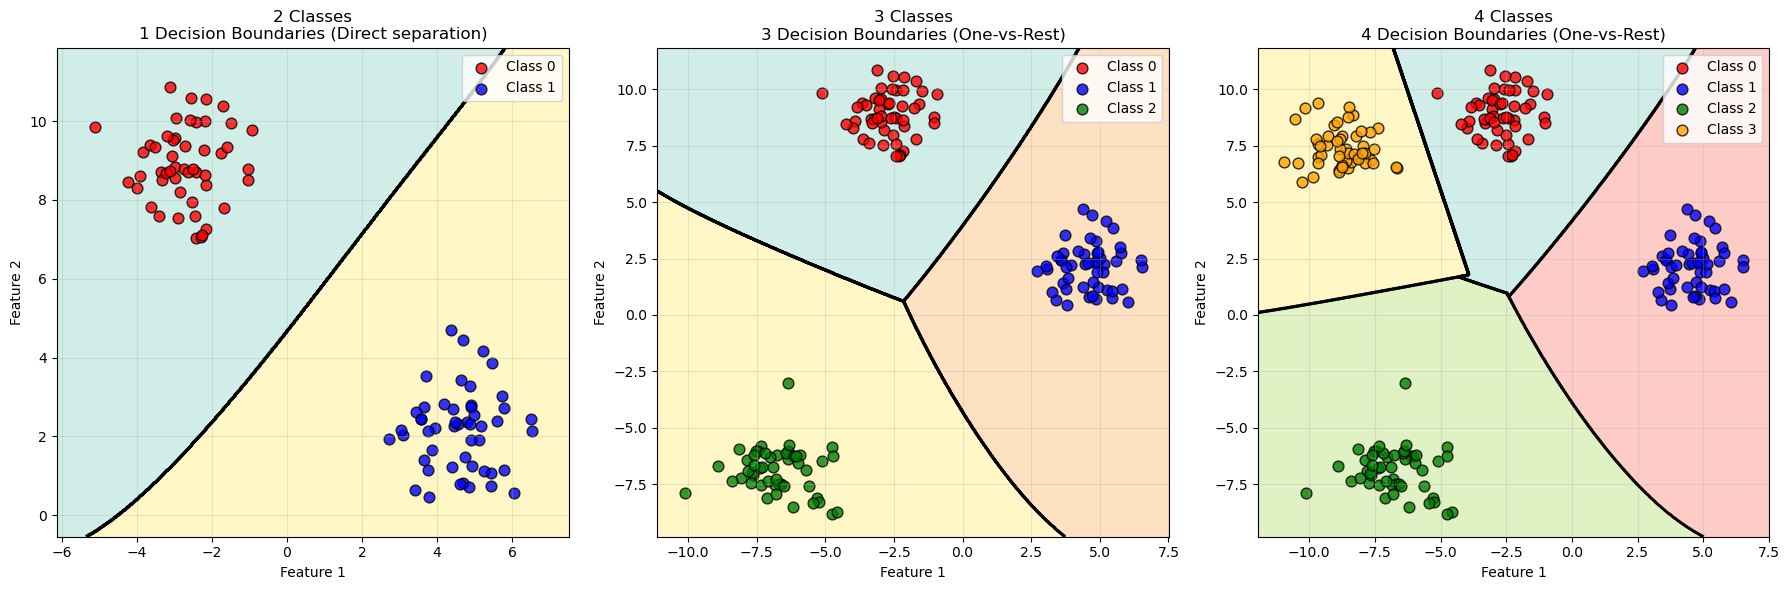


🎯 Summary:
   2 Classes → 1 decision boundary (one line)
   3 Classes → 3 decision boundaries (three lines)
   4 Classes → 4 decision boundaries (four lines)

✅ SVM creates MULTIPLE boundaries, not just one!


In [1]:
#!/usr/bin/env python3
"""
Simple SVM Multiple Decision Boundaries Demo
===========================================
Shows that SVM creates MULTIPLE lines/boundaries, not just one!
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

print("🔍 SVM: Multiple Decision Boundaries Demo")
print("=" * 45)

# Generate datasets
np.random.seed(42)

# 2-class data (binary)
X_2class, y_2class = make_blobs(n_samples=100, centers=2, n_features=2, 
                                random_state=42, cluster_std=1.0)

# 3-class data  
X_3class, y_3class = make_blobs(n_samples=150, centers=3, n_features=2,
                                random_state=42, cluster_std=1.0)

# 4-class data
X_4class, y_4class = make_blobs(n_samples=200, centers=4, n_features=2,
                                random_state=42, cluster_std=1.0)

datasets = {
    '2 Classes': (X_2class, y_2class),
    '3 Classes': (X_3class, y_3class), 
    '4 Classes': (X_4class, y_4class)
}

def plot_svm_boundaries(X, y, title, ax):
    """Plot SVM decision boundaries"""
    # Scale data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Train SVM
    svm = SVC(kernel='rbf', C=1, gamma='scale')
    svm.fit(X_scaled, y)
    
    # Create prediction mesh
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Get predictions for mesh
    mesh_scaled = scaler.transform(np.c_[xx.ravel(), yy.ravel()])
    Z = svm.predict(mesh_scaled)
    Z = Z.reshape(xx.shape)
    
    # Plot decision regions (colored areas)
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='Set3')
    
    # Plot decision boundaries (the actual lines!)
    ax.contour(xx, yy, Z, colors='black', linewidths=2, alpha=0.8)
    
    # Plot data points
    unique_classes = np.unique(y)
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    
    for i, class_label in enumerate(unique_classes):
        mask = y == class_label
        ax.scatter(X[mask, 0], X[mask, 1], c=colors[i], 
                  label=f'Class {class_label}', s=60, alpha=0.8, 
                  edgecolors='black', linewidth=1)
    
    # Count and show decision boundaries
    n_classes = len(unique_classes)
    if n_classes == 2:
        n_boundaries = 1
        strategy = "Direct separation"
    else:
        n_boundaries = n_classes  # One-vs-Rest default
        strategy = "One-vs-Rest"
    
    ax.set_title(f'{title}\n{n_boundaries} Decision Boundaries ({strategy})')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    return n_boundaries

# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

boundary_counts = {}
for i, (name, (X, y)) in enumerate(datasets.items()):
    n_boundaries = plot_svm_boundaries(X, y, name, axes[i])
    boundary_counts[name] = n_boundaries
    
    print(f"{name}: {n_boundaries} decision boundaries")

plt.tight_layout()
plt.show()

print("\n🎯 Summary:")
print("   2 Classes → 1 decision boundary (one line)")  
print("   3 Classes → 3 decision boundaries (three lines)")
print("   4 Classes → 4 decision boundaries (four lines)")
print("\n✅ SVM creates MULTIPLE boundaries, not just one!")

## 2. Polynomial SVM for Non-Linear Classification

When data is not linearly separable, we can use polynomial kernels to map the data into higher dimensions where it becomes separable.

**Polynomial Kernel:**
K(xᵢ, xⱼ) = (γ⟨xᵢ, xⱼ⟩ + r)^d

Where:
- γ (gamma): kernel coefficient
- r: independent term
- d: polynomial degree


In [20]:
# Generate non-linearly separable data
np.random.seed(42)
X_poly, y_poly = make_classification(n_samples=200, n_features=2, n_informative=2,
                                   n_redundant=0, n_clusters_per_class=1,
                                   class_sep=0.8, random_state=42)

# Add some non-linear transformation to make it more complex
X_poly = np.column_stack([X_poly, X_poly[:, 0]**2 + X_poly[:, 1]**2])[:, :2]

# Split and scale data
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    X_poly, y_poly, test_size=0.3, random_state=42
)

scaler_poly = StandardScaler()
X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly)
X_test_poly_scaled = scaler_poly.transform(X_test_poly)

# Create and train Polynomial SVM with different degrees
poly_degrees = [2, 3, 4]
poly_results = {}

for degree in poly_degrees:
    poly_svm = SVC(kernel='poly', degree=degree, C=1.0, gamma='scale', random_state=42)
    poly_svm.fit(X_train_poly_scaled, y_train_poly)
    y_pred_poly = poly_svm.predict(X_test_poly_scaled)
    
    accuracy = accuracy_score(y_test_poly, y_pred_poly)
    poly_results[degree] = {
        'model': poly_svm,
        'accuracy': accuracy,
        'predictions': y_pred_poly
    }
    
    print(f"Polynomial SVM (degree={degree}) Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Number of Support Vectors: {poly_svm.n_support_}")
    print("-" * 50)

Polynomial SVM (degree=2) Results:
Accuracy: 0.5000
Number of Support Vectors: [56 56]
--------------------------------------------------
Polynomial SVM (degree=3) Results:
Accuracy: 0.6667
Number of Support Vectors: [48 46]
--------------------------------------------------
Polynomial SVM (degree=4) Results:
Accuracy: 0.5000
Number of Support Vectors: [56 57]
--------------------------------------------------


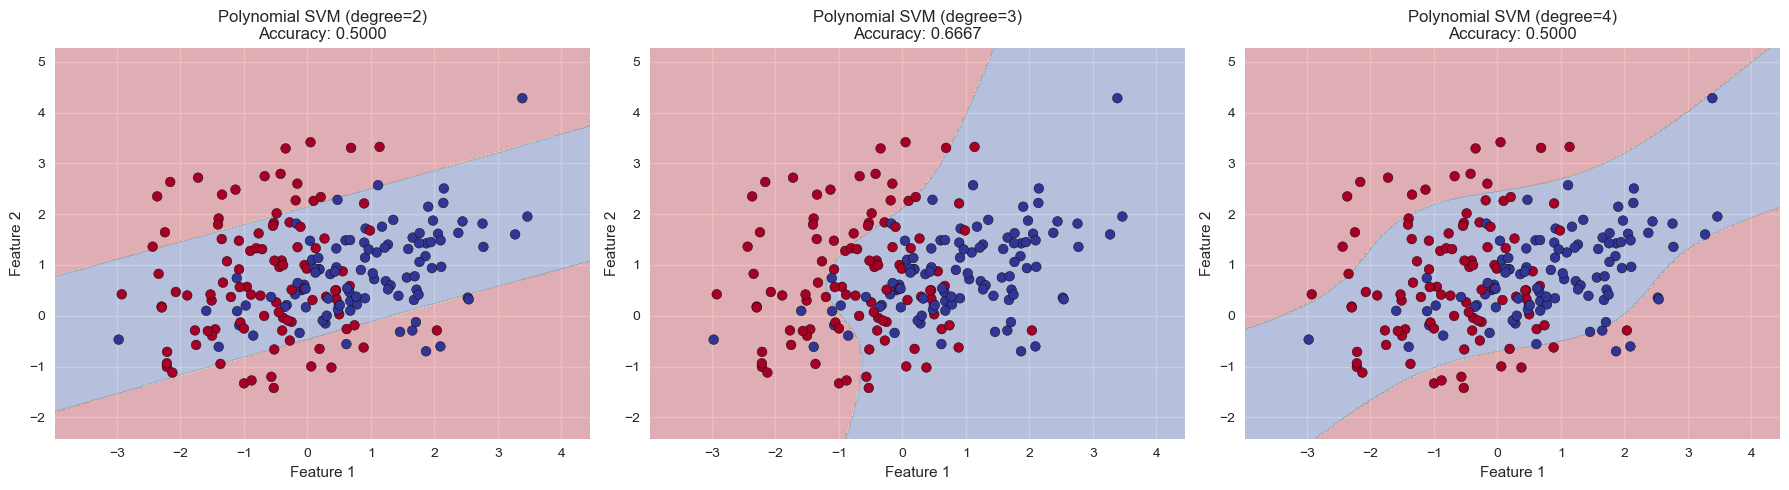

In [22]:
# Compare different polynomial degrees
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, degree in enumerate(poly_degrees):
    model = poly_results[degree]['model']
    accuracy = poly_results[degree]['accuracy']
    
    # Create subplot
    plt.sca(axes[i])
    
    # Create mesh for decision boundary
    h = 0.02
    x_min, x_max = X_poly[:, 0].min() - 1, X_poly[:, 0].max() + 1
    y_min, y_max = X_poly[:, 1].min() - 1, X_poly[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    mesh_points = scaler_poly.transform(np.c_[xx.ravel(), yy.ravel()])
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    scatter = plt.scatter(X_poly[:, 0], X_poly[:, 1], c=y_poly, 
                         cmap=plt.cm.RdYlBu, edgecolors='black')
    
    plt.title(f'Polynomial SVM (degree={degree})\nAccuracy: {accuracy:.4f}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

## 3. RBF (Radial Basis Function) SVM

The RBF kernel is one of the most popular kernels for SVM. It can handle complex non-linear relationships and is particularly effective for many real-world datasets.

**RBF Kernel:**
K(xᵢ, xⱼ) = exp(-γ||xᵢ - xⱼ||²)

Where γ controls the influence of each training example:
- Large γ: Close data points have high influence (complex boundaries, risk of overfitting)
- Small γ: Far data points have influence (smoother boundaries, risk of underfitting)



Circles Dataset:
  Gamma=0.1: Accuracy=0.8333, Support Vectors=[49 47]
  Gamma=1.0: Accuracy=0.8833, Support Vectors=[35 30]
  Gamma=10.0: Accuracy=0.8500, Support Vectors=[54 50]

Moons Dataset:
  Gamma=0.1: Accuracy=0.8333, Support Vectors=[33 33]
  Gamma=1.0: Accuracy=0.9167, Support Vectors=[28 29]
  Gamma=10.0: Accuracy=0.9000, Support Vectors=[48 52]


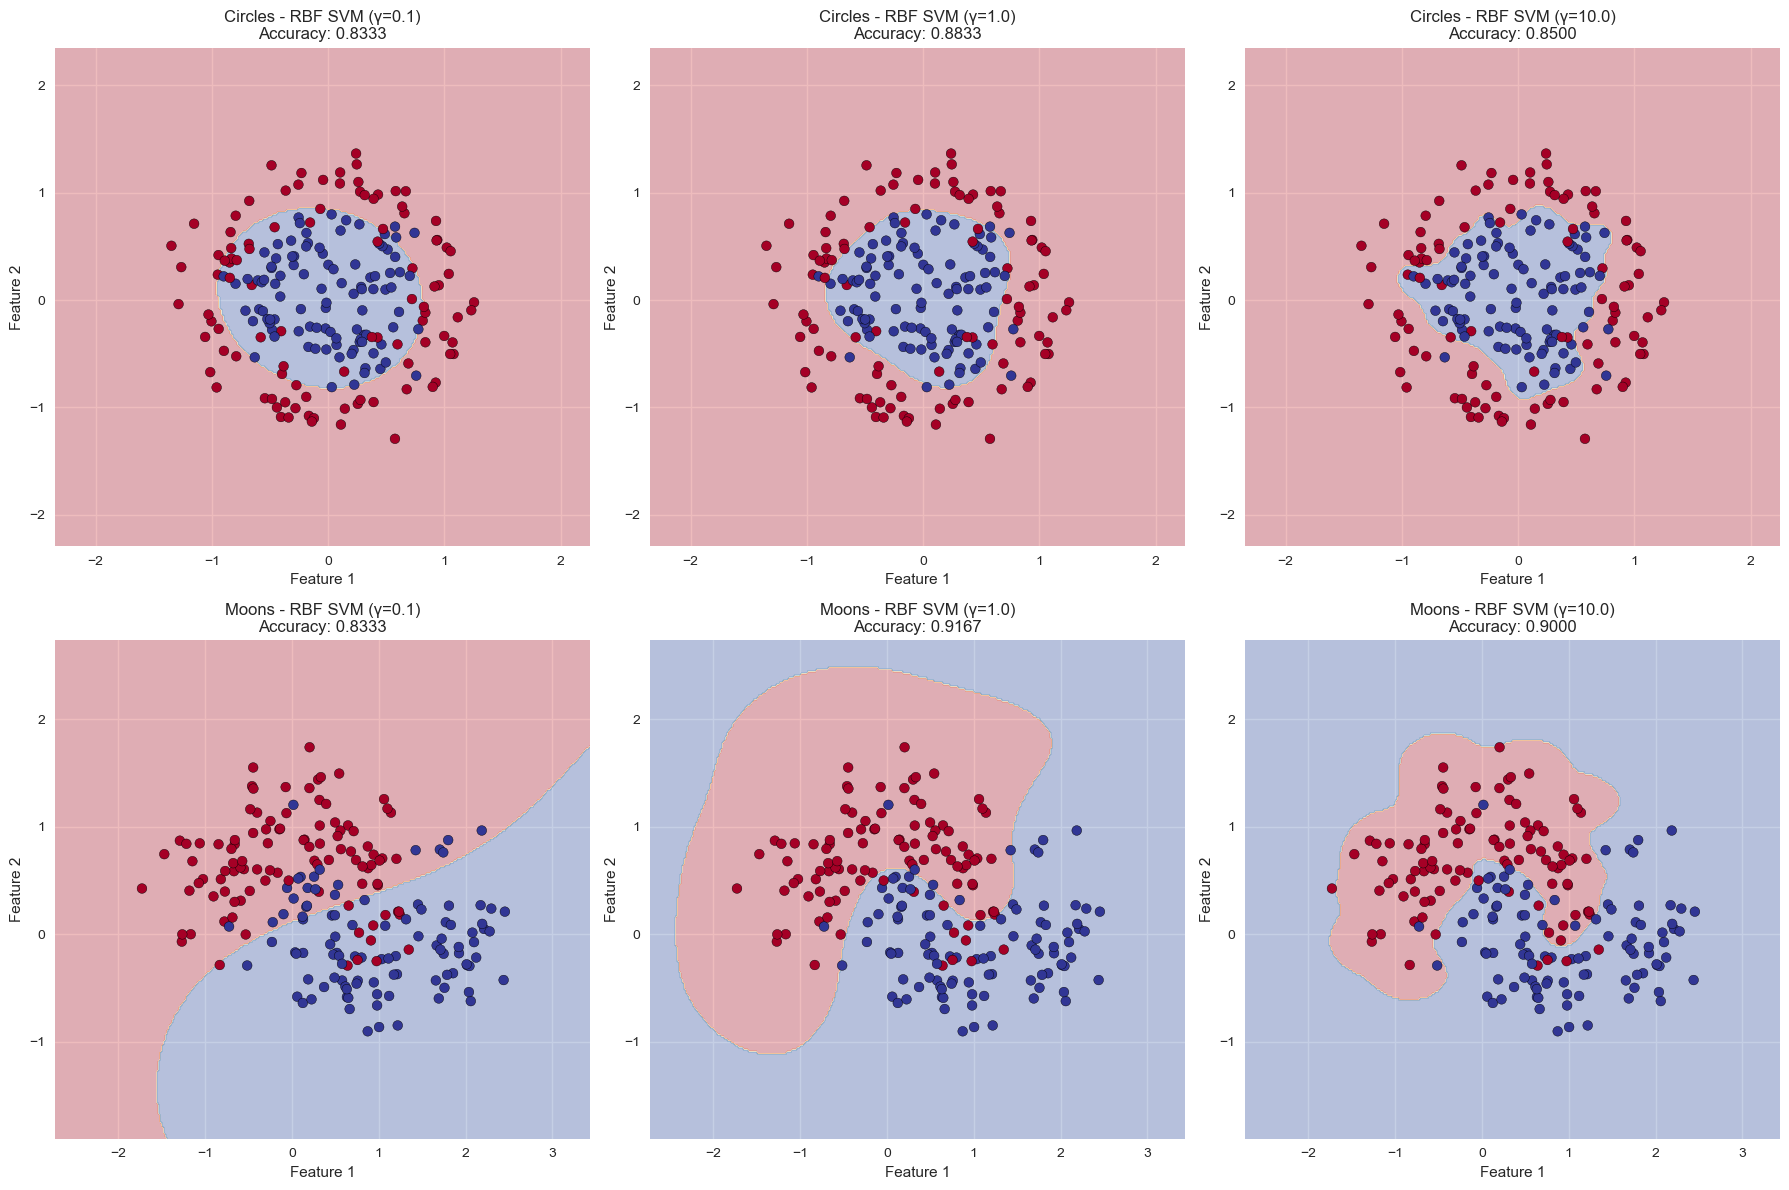

In [25]:
# Generate complex non-linear data
from sklearn.datasets import make_circles, make_moons

# Create different types of non-linear datasets
datasets = {
    'Circles': make_circles(n_samples=200, noise=0.2, factor=0.5, random_state=42),
    'Moons': make_moons(n_samples=200, noise=0.3, random_state=42)
}

# Test RBF SVM on different datasets
rbf_results = {}

for name, (X, y) in datasets.items():
    print(f"\n{name} Dataset:")
    
    # Split and scale
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Test different gamma values
    gamma_values = [0.1, 1.0, 10.0]
    
    for gamma in gamma_values:
        rbf_svm = SVC(kernel='rbf', C=1.0, gamma=gamma, random_state=42)
        rbf_svm.fit(X_train_scaled, y_train)
        y_pred = rbf_svm.predict(X_test_scaled)
        
        accuracy = accuracy_score(y_test, y_pred)
        print(f"  Gamma={gamma}: Accuracy={accuracy:.4f}, Support Vectors={rbf_svm.n_support_}")
        
        # Store results
        if name not in rbf_results:
            rbf_results[name] = {}
        rbf_results[name][gamma] = {
            'model': rbf_svm,
            'accuracy': accuracy,
            'scaler': scaler,
            'X': X,
            'y': y
        }

# Visualize RBF SVM with different gamma values
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for row, (dataset_name, dataset_results) in enumerate(rbf_results.items()):
    for col, (gamma, results) in enumerate(dataset_results.items()):
        ax = axes[row, col]
        model = results['model']
        scaler = results['scaler']
        X = results['X']
        y = results['y']
        accuracy = results['accuracy']
        
        # Create mesh
        h = 0.02
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        
        mesh_points = scaler.transform(np.c_[xx.ravel(), yy.ravel()])
        Z = model.predict(mesh_points)
        Z = Z.reshape(xx.shape)
        
        # Plot
        ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
        scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
        
        ax.set_title(f'{dataset_name} - RBF SVM (γ={gamma})\nAccuracy: {accuracy:.4f}')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

## 4. Hyperparameter Tuning and Cross-Validation

The performance of SVM heavily depends on hyperparameter selection. Key parameters include C (regularization), gamma (for RBF), and kernel choice.

**Key Hyperparameters:**
- **C**: Controls the trade-off between smooth decision boundary and classifying training points correctly
  - Large C: Low bias, high variance (risk of overfitting)
  - Small C: High bias, low variance (risk of underfitting)
- **Gamma**: Controls the influence of each training example (for RBF kernel)
- **Kernel**: linear, poly, rbf, sigmoid



Tuning LINEAR SVM...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'C': 0.1, 'kernel': 'linear'}
Best cross-validation score: 0.9748
Test set accuracy: 0.9825

Tuning RBF SVM...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score: 0.9673
Test set accuracy: 0.9532

Tuning POLY SVM...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'C': 10, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
Best cross-validation score: 0.9547
Test set accuracy: 0.9708

MODEL COMPARISON SUMMARY

LINEAR SVM:
  CV Score: 0.9748 (+/- 0.0161)
  Test Accuracy: 0.9825
  Support Vectors: 51

RBF SVM:
  CV Score: 0.9673 (+/- 0.0200)
  Test Accuracy: 0.9532
  Support Vectors: 60

POLY SVM:
  CV Score: 0.9547 (+/- 0.0380)
  Test Accuracy: 0.9708
  Support Vectors: 88

Best performing kernel: LINEAR

DETAILED ANALYSIS - LINEAR SVM

Classification Report:
  

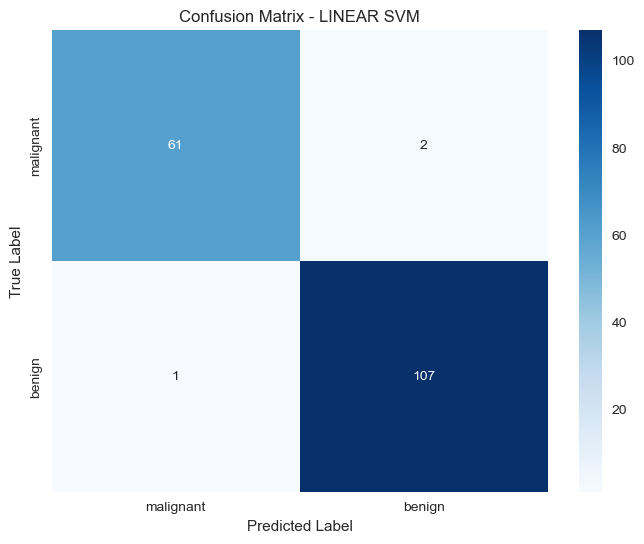

In [28]:
# Load a real dataset for comprehensive hyperparameter tuning
from sklearn.datasets import load_breast_cancer

# Load breast cancer dataset
cancer = load_breast_cancer()
X_cancer, y_cancer = cancer.data, cancer.target

# Split the data
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_cancer, y_cancer, test_size=0.3, random_state=42
)

# Scale the features (very important for SVM!)
scaler_cancer = StandardScaler()
X_train_cancer_scaled = scaler_cancer.fit_transform(X_train_cancer)
X_test_cancer_scaled = scaler_cancer.transform(X_test_cancer)

# Define parameter grids for different kernels
param_grids = {
    'linear': {
        'kernel': ['linear'],
        'C': [0.1, 1, 10, 100]
    },
    'rbf': {
        'kernel': ['rbf'],
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
    },
    'poly': {
        'kernel': ['poly'],
        'C': [0.1, 1, 10],
        'degree': [2, 3, 4],
        'gamma': ['scale', 'auto']
    }
}

# Perform grid search for each kernel
best_models = {}

for kernel_name, param_grid in param_grids.items():
    print(f"\nTuning {kernel_name.upper()} SVM...")
    
    # Grid search with cross-validation
    grid_search = GridSearchCV(
        SVC(random_state=42),
        param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train_cancer_scaled, y_train_cancer)
    
    # Store best model
    best_models[kernel_name] = grid_search.best_estimator_
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    
    # Test on test set
    test_score = grid_search.best_estimator_.score(X_test_cancer_scaled, y_test_cancer)
    print(f"Test set accuracy: {test_score:.4f}")

# Compare all models
print("\n" + "="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)

model_comparison = {}

for kernel_name, model in best_models.items():
    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train_cancer_scaled, y_train_cancer, cv=5)
    
    # Test set performance
    y_pred = model.predict(X_test_cancer_scaled)
    test_accuracy = accuracy_score(y_test_cancer, y_pred)
    
    model_comparison[kernel_name] = {
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'test_accuracy': test_accuracy,
        'n_support_vectors': model.n_support_.sum()
    }
    
    print(f"\n{kernel_name.upper()} SVM:")
    print(f"  CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"  Test Accuracy: {test_accuracy:.4f}")
    print(f"  Support Vectors: {model.n_support_.sum()}")

# Find best model
best_kernel = max(model_comparison.keys(), 
                 key=lambda k: model_comparison[k]['test_accuracy'])
print(f"\nBest performing kernel: {best_kernel.upper()}")

# Detailed analysis of the best model
best_model = best_models[best_kernel]
y_pred_best = best_model.predict(X_test_cancer_scaled)

print(f"\nDETAILED ANALYSIS - {best_kernel.upper()} SVM")
print("="*50)
print("\nClassification Report:")
print(classification_report(y_test_cancer, y_pred_best, 
                          target_names=cancer.target_names))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_cancer, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names)
plt.title(f'Confusion Matrix - {best_kernel.upper()} SVM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## 5. Support Vector Regression (SVR)

SVMs can also be used for regression tasks. Instead of finding a separating hyperplane, SVR finds a hyperplane that fits the data with a specified tolerance (epsilon).

**SVR Objective:**
Minimize: ½||w||² + C∑(ξᵢ + ξᵢ*)
Subject to: |yᵢ - (w·xᵢ + b)| ≤ ε + ξᵢ

Where ε (epsilon) defines the width of the "tube" around the regression line.


LINEAR SVR Results:
  MSE: 0.5731
  R²: -0.0747
  Support Vectors: 65
------------------------------
RBF SVR Results:
  MSE: 0.0297
  R²: 0.9442
  Support Vectors: 25
------------------------------
POLY SVR Results:
  MSE: 0.5422
  R²: -0.0166
  Support Vectors: 66
------------------------------


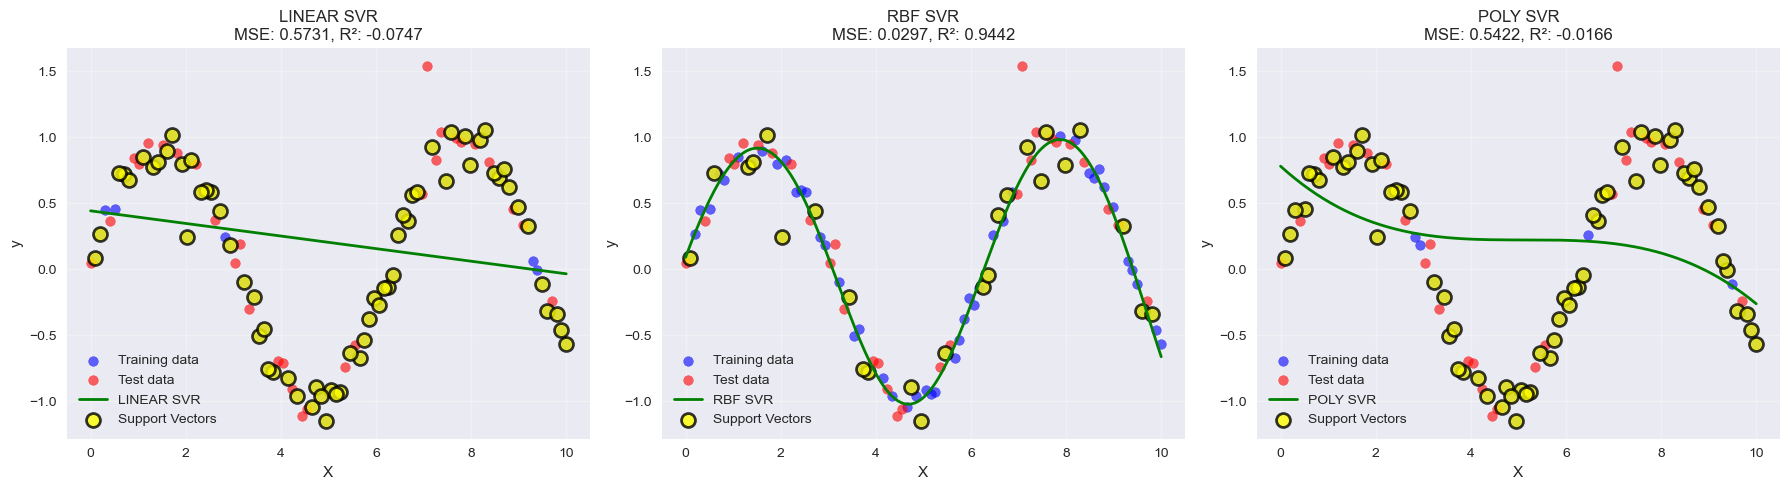

In [31]:
# Generate regression data
np.random.seed(42)
X_reg = np.linspace(0, 10, 100).reshape(-1, 1)
y_reg = np.sin(X_reg).ravel() + np.random.normal(0, 0.1, X_reg.shape[0])

# Add some outliers
outlier_indices = [20, 70]
y_reg[outlier_indices] += [-0.8, 0.8]

# Split the data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

# Scale the features
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# Test different SVR kernels
svr_kernels = ['linear', 'rbf', 'poly']
svr_models = {}

for kernel in svr_kernels:
    if kernel == 'poly':
        svr = SVR(kernel=kernel, degree=3, C=100, gamma='auto', epsilon=0.1)
    else:
        svr = SVR(kernel=kernel, C=100, gamma='auto', epsilon=0.1)
    
    svr.fit(X_train_reg_scaled, y_train_reg)
    y_pred_reg = svr.predict(X_test_reg_scaled)
    
    # Calculate metrics
    from sklearn.metrics import mean_squared_error, r2_score
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    r2 = r2_score(y_test_reg, y_pred_reg)
    
    svr_models[kernel] = {
        'model': svr,
        'mse': mse,
        'r2': r2,
        'predictions': y_pred_reg
    }
    
    print(f"{kernel.upper()} SVR Results:")
    print(f"  MSE: {mse:.4f}")
    print(f"  R²: {r2:.4f}")
    print(f"  Support Vectors: {len(svr.support_)}")
    print("-" * 30)

# Visualize SVR results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Create continuous data for smooth predictions
X_plot = np.linspace(0, 10, 200).reshape(-1, 1)
X_plot_scaled = scaler_reg.transform(X_plot)

for i, kernel in enumerate(svr_kernels):
    ax = axes[i]
    model = svr_models[kernel]['model']
    mse = svr_models[kernel]['mse']
    r2 = svr_models[kernel]['r2']
    
    # Make predictions for plotting
    y_plot = model.predict(X_plot_scaled)
    
    # Plot
    ax.scatter(X_train_reg, y_train_reg, color='blue', alpha=0.6, label='Training data')
    ax.scatter(X_test_reg, y_test_reg, color='red', alpha=0.6, label='Test data')
    ax.plot(X_plot, y_plot, color='green', linewidth=2, label=f'{kernel.upper()} SVR')
    
    # Highlight support vectors
    support_vectors_original = scaler_reg.inverse_transform(
        model.support_vectors_.reshape(-1, 1)
    )
    ax.scatter(support_vectors_original, 
              y_train_reg[model.support_], 
              color='yellow', s=100, alpha=0.8, 
              edgecolors='black', linewidth=2,
              label='Support Vectors')
    
    ax.set_title(f'{kernel.upper()} SVR\nMSE: {mse:.4f}, R²: {r2:.4f}')
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Advanced SVM Techniques and Practical Considerations

### Handling Imbalanced Datasets


In [34]:
# Create imbalanced dataset
from sklearn.datasets import make_classification
from collections import Counter

X_imb, y_imb = make_classification(n_samples=1000, n_features=2, n_informative=2,
                                  n_redundant=0, n_clusters_per_class=1,
                                  weights=[0.9, 0.1], random_state=42)

print("Class distribution:", Counter(y_imb))

# Split and scale
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(
    X_imb, y_imb, test_size=0.3, random_state=42, stratify=y_imb
)

scaler_imb = StandardScaler()
X_train_imb_scaled = scaler_imb.fit_transform(X_train_imb)
X_test_imb_scaled = scaler_imb.transform(X_test_imb)

# Compare different approaches for imbalanced data
approaches = {
    'Standard SVM': SVC(kernel='rbf', C=1, gamma='scale', random_state=42),
    'Balanced SVM': SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced', random_state=42),
    'Custom Weights': SVC(kernel='rbf', C=1, gamma='scale', class_weight={0: 1, 1: 9}, random_state=42)
}

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

print("\nImbalanced Dataset Results:")
print("="*60)

for name, model in approaches.items():
    model.fit(X_train_imb_scaled, y_train_imb)
    y_pred_imb = model.predict(X_test_imb_scaled)
    y_prob_imb = model.decision_function(X_test_imb_scaled)
    
    # Calculate metrics
    precision, recall, f1, _ = precision_recall_fscore_support(y_test_imb, y_pred_imb, average='weighted')
    auc = roc_auc_score(y_test_imb, y_prob_imb)
    
    print(f"\n{name}:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  AUC: {auc:.4f}")

Class distribution: Counter({0: 895, 1: 105})

Imbalanced Dataset Results:

Standard SVM:
  Precision: 0.9836
  Recall: 0.9833
  F1-Score: 0.9827
  AUC: 0.9447

Balanced SVM:
  Precision: 0.9781
  Recall: 0.9767
  F1-Score: 0.9771
  AUC: 0.9694

Custom Weights:
  Precision: 0.9755
  Recall: 0.9733
  F1-Score: 0.9740
  AUC: 0.9596


### Feature Selection and Dimensionality

Dataset shape: (200, 1000)
Features:  10, Accuracy: 0.7500
Features:  50, Accuracy: 0.6667
Features: 100, Accuracy: 0.6500
Features: 500, Accuracy: 0.6667


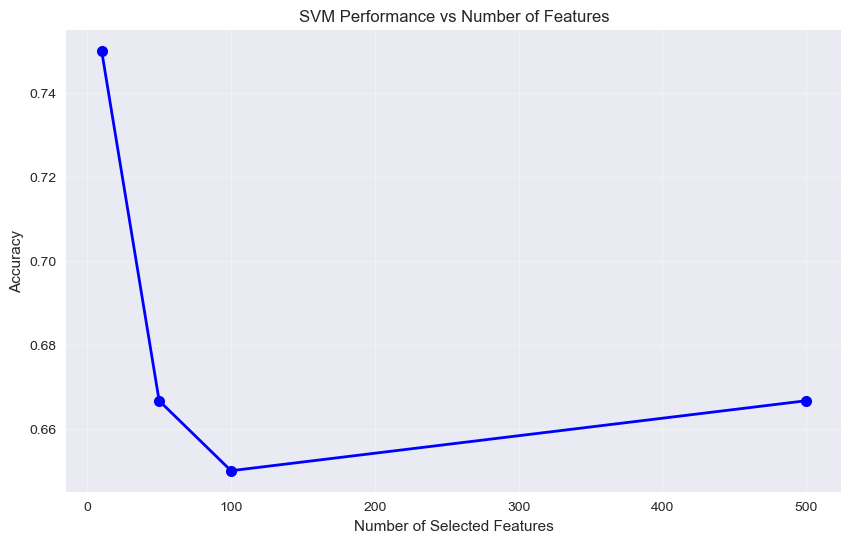

In [37]:
# Demonstrate SVM with high-dimensional data
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

# Create high-dimensional dataset
X_high_dim, y_high_dim = make_classification(n_samples=200, n_features=1000, 
                                           n_informative=10, n_redundant=10,
                                           random_state=42)

print(f"Dataset shape: {X_high_dim.shape}")

# Split data
X_train_hd, X_test_hd, y_train_hd, y_test_hd = train_test_split(
    X_high_dim, y_high_dim, test_size=0.3, random_state=42
)

# Create pipelines with different numbers of features
feature_counts = [10, 50, 100, 500]
results_feature_selection = {}

for n_features in feature_counts:
    # Create pipeline: Feature Selection -> Scaling -> SVM
    pipeline = Pipeline([
        ('feature_selection', SelectKBest(f_classif, k=n_features)),
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='rbf', C=10, gamma='scale', random_state=42))
    ])
    
    # Fit and evaluate
    pipeline.fit(X_train_hd, y_train_hd)
    accuracy = pipeline.score(X_test_hd, y_test_hd)
    
    results_feature_selection[n_features] = accuracy
    print(f"Features: {n_features:3d}, Accuracy: {accuracy:.4f}")

# Plot results
plt.figure(figsize=(10, 6))
features = list(results_feature_selection.keys())
accuracies = list(results_feature_selection.values())

plt.plot(features, accuracies, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Selected Features')
plt.ylabel('Accuracy')
plt.title('SVM Performance vs Number of Features')
plt.grid(True, alpha=0.3)
plt.show()

## 7. Real-World Applications and Best Practices

### Text Classification Example

In [41]:
# Text classification with SVM
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

# Load a subset of the 20 newsgroups dataset
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, 
                                     remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories,
                                    remove=('headers', 'footers', 'quotes'))

# Vectorize text data
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_train_text = vectorizer.fit_transform(newsgroups_train.data)
X_test_text = vectorizer.transform(newsgroups_test.data)

y_train_text = newsgroups_train.target
y_test_text = newsgroups_test.target

print(f"Training data shape: {X_train_text.shape}")
print(f"Test data shape: {X_test_text.shape}")

# Train linear SVM (typically best for text)
text_svm = SVC(kernel='linear', C=1.0, random_state=42)
text_svm.fit(X_train_text, y_train_text)

# Evaluate
y_pred_text = text_svm.predict(X_test_text)
accuracy_text = accuracy_score(y_test_text, y_pred_text)

print(f"\nText Classification Results:")
print(f"Accuracy: {accuracy_text:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_text, y_pred_text, 
                           target_names=newsgroups_train.target_names))

Training data shape: (2257, 10000)
Test data shape: (1502, 10000)

Text Classification Results:
Accuracy: 0.8196

Classification Report:
                        precision    recall  f1-score   support

           alt.atheism       0.76      0.63      0.69       319
         comp.graphics       0.90      0.90      0.90       389
               sci.med       0.81      0.89      0.84       396
soc.religion.christian       0.80      0.83      0.81       398

              accuracy                           0.82      1502
             macro avg       0.82      0.81      0.81      1502
          weighted avg       0.82      0.82      0.82      1502



### Performance Comparison with Other Algorithms

In [58]:
# Compare SVM with other algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import time

# Use the breast cancer dataset
algorithms = {
    'SVM (RBF)': SVC(kernel='rbf', C=10, gamma='scale', random_state=42),
    'SVM (Linear)': SVC(kernel='linear', C=1, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=1),  # Added n_jobs=1
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),  # Added max_iter
    'K-NN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

algorithm_results = {}

print("Algorithm Comparison on Breast Cancer Dataset:")
print("="*60)

for name, algorithm in algorithms.items():
    # Time the training
    start_time = time.time()
    algorithm.fit(X_train_cancer_scaled, y_train_cancer)
    training_time = time.time() - start_time
    
    # Time the prediction
    start_time = time.time()
    y_pred_comp = algorithm.predict(X_test_cancer_scaled)
    prediction_time = time.time() - start_time
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_cancer, y_pred_comp)
    precision, recall, f1, _ = precision_recall_fscore_support(  # Fixed the underscore
        y_test_cancer, y_pred_comp, average='weighted'
    )
    
    algorithm_results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'train_time': training_time,
        'pred_time': prediction_time
    }
    
    print(f"\n{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  Training Time: {training_time:.4f}s")
    print(f"  Prediction Time: {prediction_time:.4f}s")

Algorithm Comparison on Breast Cancer Dataset:

SVM (RBF):
  Accuracy: 0.9766
  F1-Score: 0.9766
  Training Time: 0.0047s
  Prediction Time: 0.0010s

SVM (Linear):
  Accuracy: 0.9766
  F1-Score: 0.9766
  Training Time: 0.0020s
  Prediction Time: 0.0010s

Random Forest:
  Accuracy: 0.9708
  F1-Score: 0.9706
  Training Time: 0.1499s
  Prediction Time: 0.0040s

Logistic Regression:
  Accuracy: 0.9825
  F1-Score: 0.9825
  Training Time: 0.0027s
  Prediction Time: 0.0000s

K-NN:
  Accuracy: 0.9591
  F1-Score: 0.9590
  Training Time: 0.0000s
  Prediction Time: 0.0055s

Naive Bayes:
  Accuracy: 0.9357
  F1-Score: 0.9356
  Training Time: 0.0000s
  Prediction Time: 0.0000s


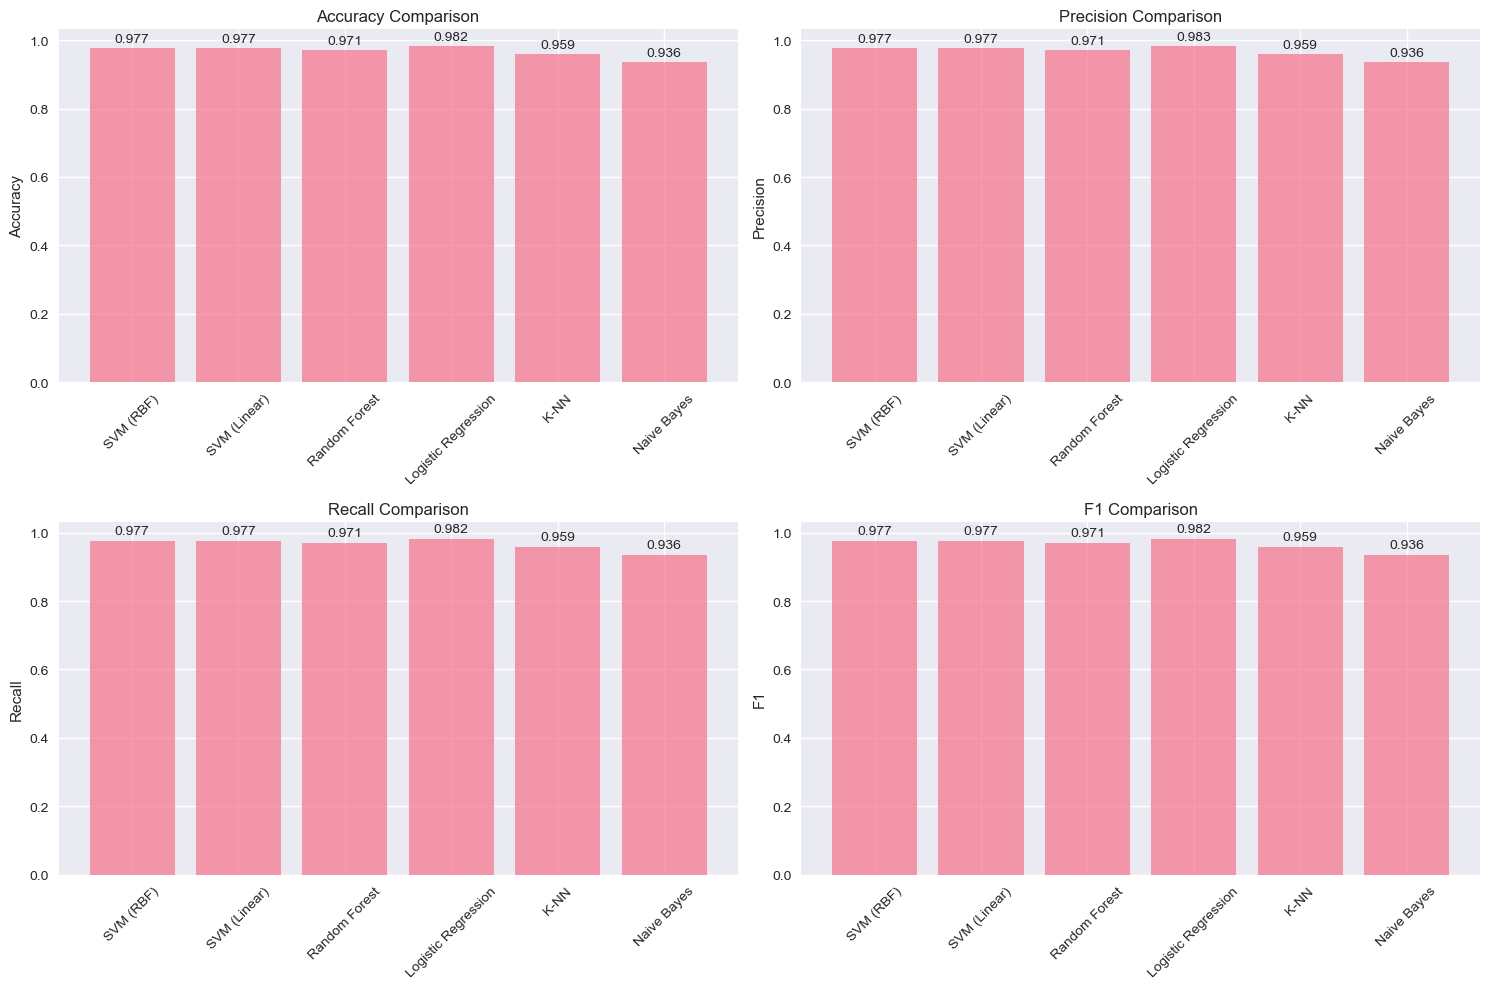

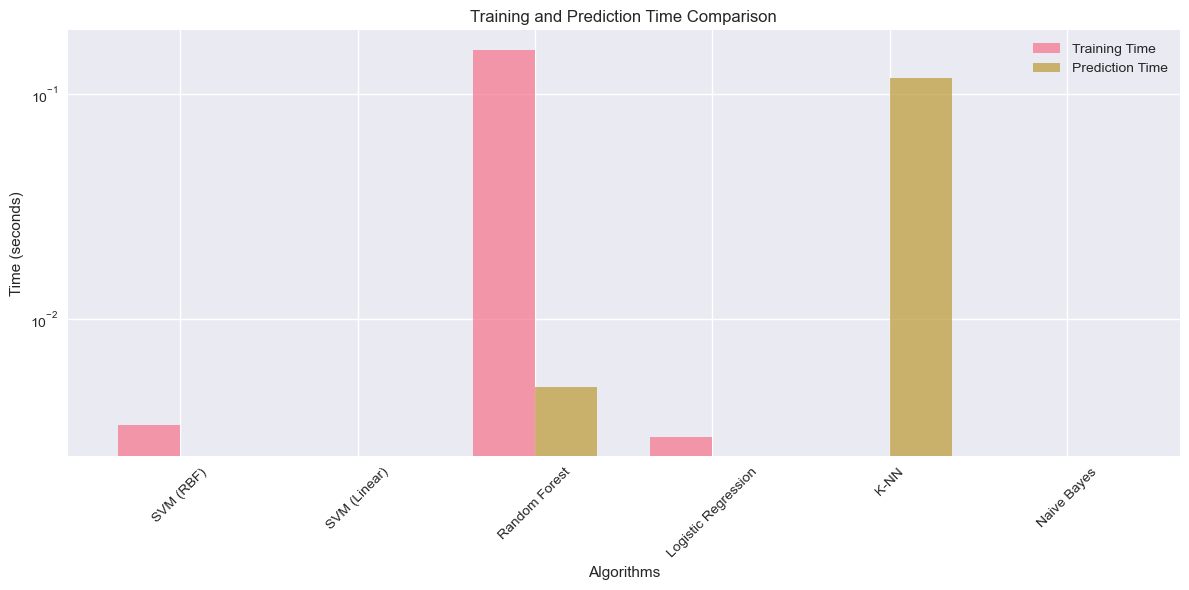

In [44]:
# Visualize algorithm comparison
metrics = ['accuracy', 'precision', 'recall', 'f1']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, metric in enumerate(metrics):
    ax = axes[i]
    algorithms_list = list(algorithm_results.keys())
    values = [algorithm_results[alg][metric] for alg in algorithms_list]
    
    bars = ax.bar(algorithms_list, values, alpha=0.7)
    ax.set_title(f'{metric.capitalize()} Comparison')
    ax.set_ylabel(metric.capitalize())
    ax.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar, value in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Time comparison
plt.figure(figsize=(12, 6))
algorithms_list = list(algorithm_results.keys())
train_times = [algorithm_results[alg]['train_time'] for alg in algorithms_list]
pred_times = [algorithm_results[alg]['pred_time'] for alg in algorithms_list]

x = np.arange(len(algorithms_list))
width = 0.35

plt.bar(x - width/2, train_times, width, label='Training Time', alpha=0.7)
plt.bar(x + width/2, pred_times, width, label='Prediction Time', alpha=0.7)

plt.xlabel('Algorithms')
plt.ylabel('Time (seconds)')
plt.title('Training and Prediction Time Comparison')
plt.xticks(x, algorithms_list, rotation=45)
plt.legend()
plt.yscale('log')  # Log scale for better visualization
plt.tight_layout()
plt.show()

## 8. Summary and Best Practices

### When to Use SVM:

**✅ Good for:**
- High-dimensional data (text classification, genomics)
- Small to medium-sized datasets
- Non-linear problems with appropriate kernels
- Binary and multi-class classification
- Robust to overfitting (especially in high dimensions)

**❌ Not ideal for:**
- Very large datasets (training time scales poorly)
- Datasets with lots of noise
- When probability estimates are crucial
- When interpretability is paramount

### Key Hyperparameter Guidelines:

In [49]:
# Hyperparameter tuning guidelines
hyperparameter_guide = {
    'C (Regularization)': {
        'Small C (0.1-1)': 'More regularization, simpler model, may underfit',
        'Large C (10-100+)': 'Less regularization, complex model, may overfit',
        'Typical range': '[0.1, 1, 10, 100, 1000]'
    },
    'Gamma (RBF kernel)': {
        'Small gamma (0.001-0.01)': 'Far points influence, smoother boundary',
        'Large gamma (1-10)': 'Close points influence, complex boundary',
        'Auto/Scale': 'Use sklearn defaults based on features'
    },
    'Kernel Selection': {
        'Linear': 'High-dimensional data, text classification',
        'RBF': 'Most cases, non-linear relationships',
        'Polynomial': 'Specific polynomial relationships',
        'Custom': 'Domain-specific kernels'
    }
}

for param, guide in hyperparameter_guide.items():
    print(f"\n{param}:")
    for key, value in guide.items():
        print(f"  {key}: {value}")


C (Regularization):
  Small C (0.1-1): More regularization, simpler model, may underfit
  Large C (10-100+): Less regularization, complex model, may overfit
  Typical range: [0.1, 1, 10, 100, 1000]

Gamma (RBF kernel):
  Small gamma (0.001-0.01): Far points influence, smoother boundary
  Large gamma (1-10): Close points influence, complex boundary
  Auto/Scale: Use sklearn defaults based on features

Kernel Selection:
  Linear: High-dimensional data, text classification
  RBF: Most cases, non-linear relationships
  Polynomial: Specific polynomial relationships
  Custom: Domain-specific kernels


### Final Recommendations:

In [54]:
# Best practices checklist
best_practices = [
    "1. Always scale/normalize features before training SVM",
    "2. Start with RBF kernel for most problems",
    "3. Use GridSearchCV for hyperparameter tuning",
    "4. Consider class imbalance with class_weight parameter",
    "5. For text data, linear kernel often works best",
    "6. Monitor training time for large datasets",
    "7. Use cross-validation for robust evaluation",
    "8. Consider feature selection for high-dimensional data",
    "9. Validate on truly independent test set",
    "10. Compare with simpler baselines first"
]

print("SVM Best Practices Checklist:")
print("="*40)
for practice in best_practices:
    print(practice)


SVM Best Practices Checklist:
1. Always scale/normalize features before training SVM
2. Start with RBF kernel for most problems
3. Use GridSearchCV for hyperparameter tuning
4. Consider class imbalance with class_weight parameter
5. For text data, linear kernel often works best
6. Monitor training time for large datasets
7. Use cross-validation for robust evaluation
8. Consider feature selection for high-dimensional data
9. Validate on truly independent test set
10. Compare with simpler baselines first
